In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('boston.csv')

Chuẩn hoá dữ liệu đầu vào 

In [2]:
def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i - avg) / (maxi - mini) for i in x]
    
    return new

In [3]:
df = data.copy()
df[:5]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df = df.apply(normal, axis=0)
df[:5]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.494954,-0.045616,0.073108,-0.332722,-0.06006,-0.039391,0.059911,-0.032196,0.039670,-0.375375,-0.216595,-0.366052,0.095155,-0.207931,0.027361
1,-0.492974,-0.045330,-0.106892,-0.156425,-0.06006,-0.181367,0.030089,0.113549,0.131219,-0.331897,-0.319846,-0.075354,0.095155,-0.093141,-0.025973
2,-0.489014,-0.045261,-0.106892,-0.337536,-0.06006,-0.204000,0.141824,-0.238579,0.245521,-0.288419,-0.358087,0.029297,0.089385,-0.264223,0.236250
3,-0.487034,-0.044763,-0.106892,-0.337536,-0.06006,-0.204000,0.170678,-0.149217,0.245521,-0.288419,-0.358087,0.029297,0.095155,-0.198274,0.298472
4,-0.483073,-0.044501,0.018108,-0.126796,-0.06006,-0.068198,-0.049113,-0.017302,0.193156,-0.201462,-0.187914,-0.377680,0.091850,-0.002357,0.002916


In [5]:
# remove 'medv'
Xd = df.drop(columns=['medv'])
Xd[:5]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.494954,-0.045616,0.073108,-0.332722,-0.06006,-0.039391,0.059911,-0.032196,0.039670,-0.375375,-0.216595,-0.366052,0.095155,-0.207931
1,-0.492974,-0.045330,-0.106892,-0.156425,-0.06006,-0.181367,0.030089,0.113549,0.131219,-0.331897,-0.319846,-0.075354,0.095155,-0.093141
2,-0.489014,-0.045261,-0.106892,-0.337536,-0.06006,-0.204000,0.141824,-0.238579,0.245521,-0.288419,-0.358087,0.029297,0.089385,-0.264223
3,-0.487034,-0.044763,-0.106892,-0.337536,-0.06006,-0.204000,0.170678,-0.149217,0.245521,-0.288419,-0.358087,0.029297,0.095155,-0.198274
4,-0.483073,-0.044501,0.018108,-0.126796,-0.06006,-0.068198,-0.049113,-0.017302,0.193156,-0.201462,-0.187914,-0.377680,0.091850,-0.002357


In [6]:
# Them bias vao cot 0, name: X0, value: 1
Xd.insert(0, 'X0', 1)
Xd[:5]

,X0,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,-0.494954,-0.045616,0.073108,-0.332722,-0.06006,-0.039391,0.059911,-0.032196,0.039670,-0.375375,-0.216595,-0.366052,0.095155,-0.207931
1,1,-0.492974,-0.045330,-0.106892,-0.156425,-0.06006,-0.181367,0.030089,0.113549,0.131219,-0.331897,-0.319846,-0.075354,0.095155,-0.093141
2,1,-0.489014,-0.045261,-0.106892,-0.337536,-0.06006,-0.204000,0.141824,-0.238579,0.245521,-0.288419,-0.358087,0.029297,0.089385,-0.264223
3,1,-0.487034,-0.044763,-0.106892,-0.337536,-0.06006,-0.204000,0.170678,-0.149217,0.245521,-0.288419,-0.358087,0.029297,0.095155,-0.198274
4,1,-0.483073,-0.044501,0.018108,-0.126796,-0.06006,-0.068198,-0.049113,-0.017302,0.193156,-0.201462,-0.187914,-0.377680,0.091850,-0.002357


In [7]:
# numpy array format

# lay gia tri 'medv' vao y
y = df.medv.values
X = Xd.values

In [8]:
# sample size
m = len(df.index)
n = X.shape[1]

# Initialize theta
theta = np.ones(n)

print(m, n)

333 15


In [9]:
# Vectorization

def cost(theta, X=X, y=y, m=m):
    y_hat = np.dot(X, theta)
    cost = sum((y_hat - y)**2)
    return cost

def cost_dev(theta=theta, X=X, y=y, m=m):
    dev = np.dot(X.T, np.dot(X,theta) - y)
    dev = (1/m) * dev 
    return np.array(dev)

Text(0, 0.5, 'Gia tri loss')

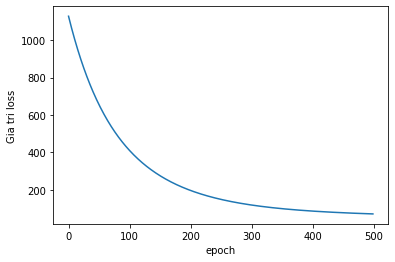

In [10]:
# learning rate
learning_rate = 0.01
cost_list = []

for i in range(500):
    theta = theta - learning_rate * cost_dev(theta)         
    cost_val = cost(theta)
    cost_list.append(cost_val)

plt.plot(np.arange(0, 500), cost_list)
plt.xlabel('epoch')
plt.ylabel('Gia tri loss')
    